<a href="https://colab.research.google.com/github/Babs-Coding/Refonte/blob/main/Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import zipfile
import os

dataset_path = 'ml-32m'
rating_file = 'ratings.csv'
rating_file_path = os.path.join(dataset_path, rating_file)
movies_file = 'movies.csv'
movies_file_path = os.path.join(dataset_path, movies_file)

#load and inspect data
rating = pd.read_csv(rating_file_path)
movies = pd.read_csv(movies_file_path)


print("Movies Data:")
print(movies.head())
print("\nRatings Data:")
print(rating.head())

print("\nMissing values in Movies Data:")
print(movies.isnull().sum())

print("\nMissing values in Ratings Data:")
print(rating.isnull().sum())

rating.drop_duplicates(inplace=True)
movies.drop_duplicates(inplace=True)

rating['timestamp'] = pd.to_datetime(rating['timestamp'], unit='s')
data = pd.merge(rating, movies, on='movieId', how='left')
data.head()

genres = data['genres'].str.get_dummies(sep='|')
data = pd.concat([data, genres], axis=1)
data.head()

print("\nPreprocessed Data:")
print(data.head())

data.to_csv('preprocessed_data.csv', index=False)







Movies Data:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings Data:
   userId  movieId  rating  timestamp
0       1       17     4.0  944249077
1       1       25     1.0  944250228
2       1       29     2.0  943230976
3       1       30     5.0  944249077
4       1       32     5.0  943228858

Missing values in Movies Data:
movieId    0
title      0
genres     0
dtype: int64

Missing values in Ratings Data:
userId       0
movieId      0
ra

<ipython-input-2-967462a50bc7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=data, palette='viridis')


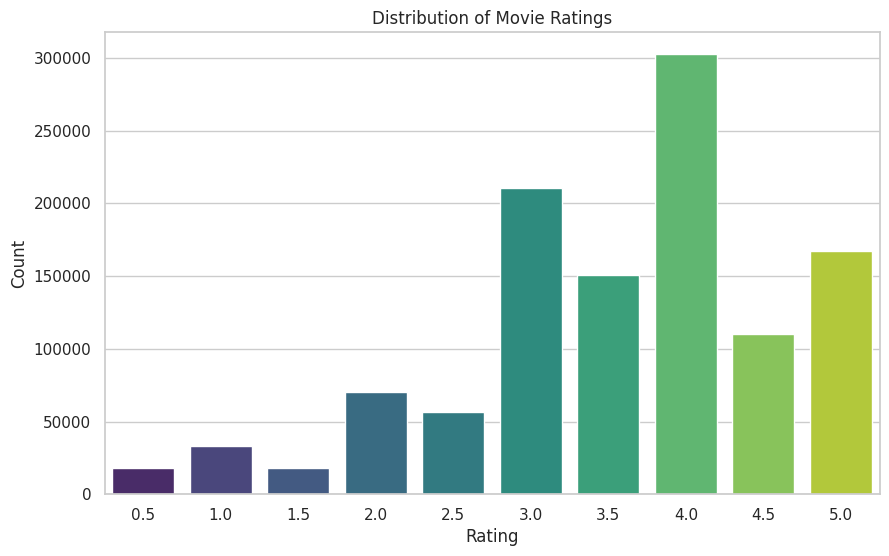

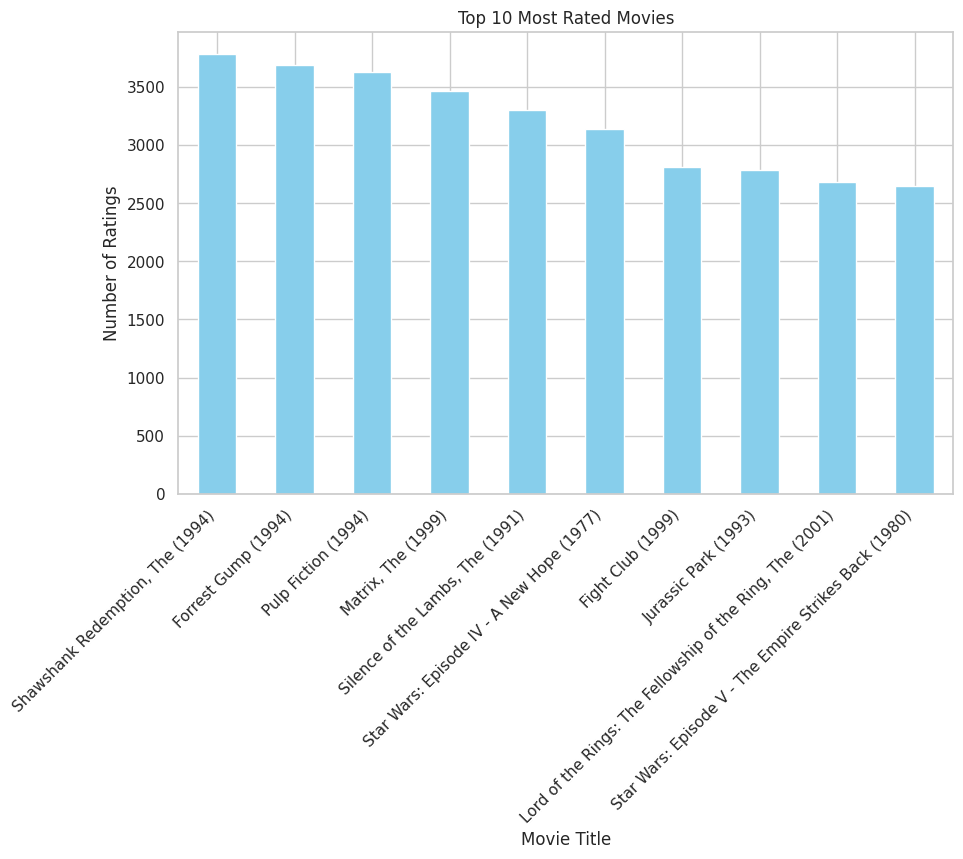

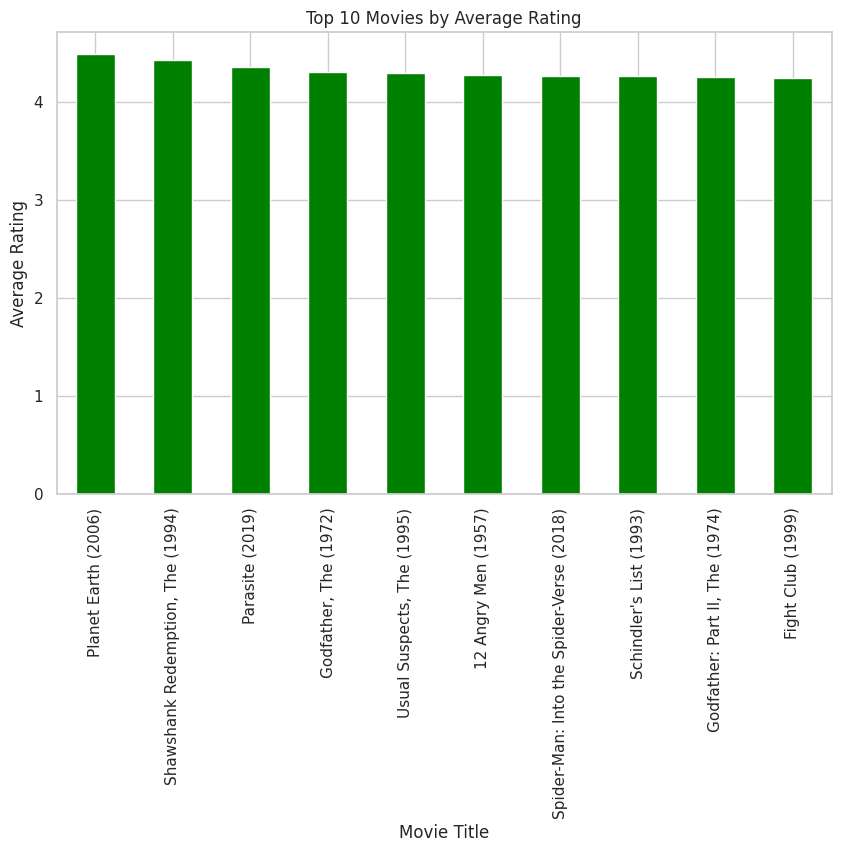

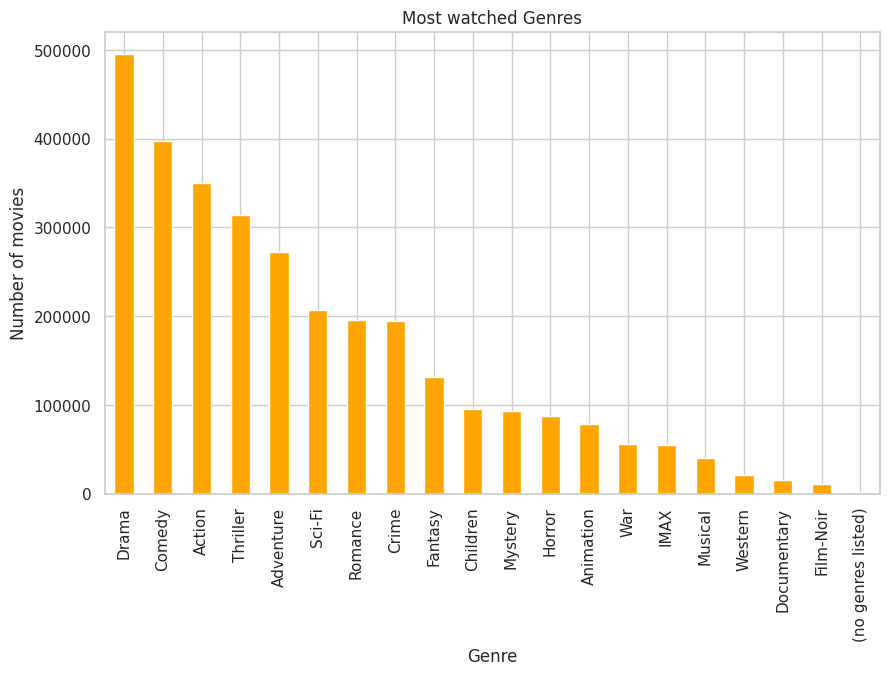

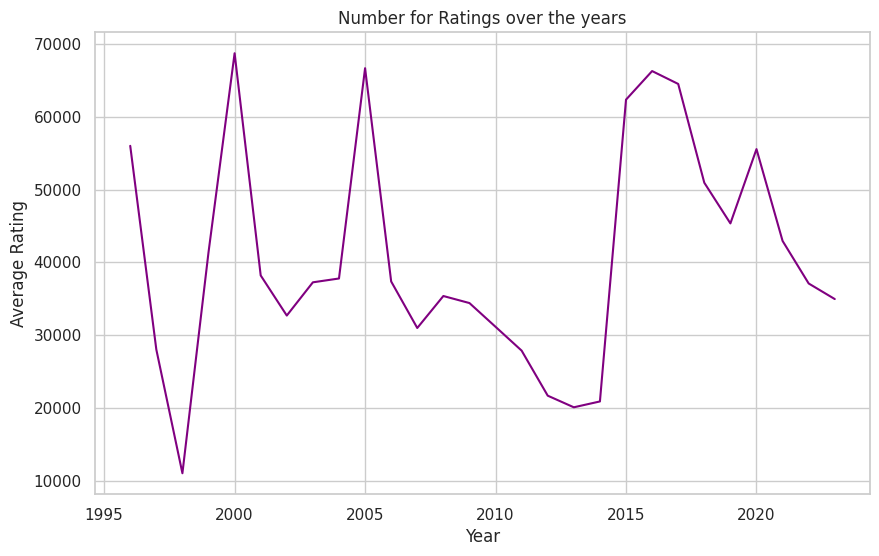

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

data = pd.read_csv('preprocessed_data.csv', parse_dates=['timestamp'])

#Analysing distributed rating
plt.figure()
sns.countplot(x='rating', data=data, palette='viridis')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#Most Rated Movies
top_movies = data.groupby('title').size().sort_values(ascending=False)[:10]
plt.figure()
top_movies.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

avrg_ratings = data.groupby('title')['rating'].mean()
top_avrg_rating = avrg_ratings[data['title'].value_counts() >= 100].sort_values(ascending=False).head(10)

#Polularity of genre
plt.figure()
top_avrg_rating.plot(kind='bar', color='green')
plt.title('Top 10 Movies by Average Rating')
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.show()

genre_counts = data.drop(columns=['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres']).sum().sort_values(ascending=False)


plt.figure()
genre_counts.plot(kind='bar', color='orange')
plt.title('Most watched Genres')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.show()

data['year'] = data['timestamp'].dt.year
rating_by_year = data.groupby('year').size()

plt.figure()
rating_by_year.plot(kind='line', color='purple')
plt.title('Number for Ratings over the years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('preprocessed_data.csv')

genre_col_index = data.columns.get_loc('genres')
genre_col = data.columns[genre_col_index + 1:]


movies_f = data.groupby('movieId').agg({'title': 'first', 'rating': 'mean'}).reset_index()
genre_means = data.groupby('movieId')[genre_col].mean().reset_index()
movies_f = pd.merge(movies_f, genre_means, on='movieId', how='left')

scarler = StandardScaler()
genre_m = scarler.fit_transform(movies_f[genre_col])
similarity = cosine_similarity(genre_m)

#Function for recommending movies

def recommend_movies(movie_title, top_m = 10):
  if movie_title not in movies_f['title'].values:
    return f"Movie '{movie_title}' not found in the dataset."

  movie_index = movies_f[movies_f['title'] == movie_title].index[0]
  similar_movies = list(enumerate(similarity[movie_index]))
  similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)
  top_indices = [i for i, _ in similar_movies[1:top_m+1]]
  recommendation = movies_f.iloc[top_indices]
  [['title', 'rating']]

  return recommendation

print("Recommendations for Toy Story (1995):")
print(recommend_movies('Toy Story (1995)'))

print("\nRecommendations for Pulp Fiction (1994):")
print(recommend_movies('Pulp Fiction (1994)'))

Recommendations for Toy Story (1995):
       movieId                                              title    rating  \
1857      2294                                        Antz (1998)  3.071429   
2563      3114                                 Toy Story 2 (1999)  3.797398   
3060      3754     Adventures of Rocky and Bullwinkle, The (2000)  2.718750   
3270      4016                   Emperor's New Groove, The (2000)  3.441489   
3955      4886                              Monsters, Inc. (2001)  3.743316   
6943     33463  DuckTales: The Movie - Treasure of the Lost La...  3.000000   
7780     53121                             Shrek the Third (2007)  2.552083   
8479     65577                     Tale of Despereaux, The (2008)  3.500000   
9819     91355  Asterix and the Vikings (Astérix et les Viking...  2.000000   
10459   103755                                       Turbo (2013)  3.250000   

       (no genres listed)  Action  Adventure  Animation  Children  Comedy  \
1857           

In [ ]:

!pip install numpy==1.24.4
!pip install scikit-surprise

import numpy as np
import pandas as pd
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

rating = pd.read_csv('preprocessed_data.csv')[['userId', 'movieId', 'rating']]

data = Dataset.load_from_df(rating[['userId', 'movieId', 'rating']], Reader())
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

model = SVD()
model.fit(trainset)

predictions = model.test(testset)
rsmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)


from collections import defaultdict

def get_top_movies(predictions, n=10):
  top_movies = defaultdict(list)
  for uid, iid, true_r, est, _ in predictions:
    top_movies[uid].append((iid, est))

  for uid, user_ratings in top_movies.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    top_movies[uid] = user_ratings[:n]

  return top_movies

#top 10 recommendations
top_movie_recommendations =  get_top_movies(predictions, n=10)

user_id = 1
movie_ids = [iid for (iid, _) in top_movie_recommendations[user_id]]
predicted_ratings = [est for (_, est) in top_movie_recommendations[user_id]]

movies = pd.read_csv('ml-32m/movies.csv')
movie_num = dict(zip(movies['movieId'], movies['title']))
recommend_title =  [movie_num[iid] for iid in movie_ids
                    if iid in movie_num]
print(f"Top 10 recommended movies for user {user_id}:")
print(recommend_title)

from surprise.model_selection import cross_validate

cv_results = cross_validate(SVD(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

print("average RMSE:" , round(cv_results['test_rmse'].mean(), 4))
print("average MAE:" , round(cv_results['test_mae'].mean(), 4))



from sklearn.metrics import precision_score, recall_score, f1_score

def precision_at_k(User_rec, actual_movie, k=10):
  recommended = set(User_rec[:k])
  relevant = set(actual_movie)
  precision = len(recommended.intersection(relevant)) / k
  return precision

data = pd.read_csv('preprocessed_data.csv')

movies_f = data.groupby('movieId').agg({'title': 'first', 'rating': 'mean'}).reset_index()
genre_means = data.groupby('movieId')[genre_col].mean().reset_index()
movies_f = pd.merge(movies_f, genre_means, on='movieId', how='left')

scarler = StandardScaler()
genre_m = scarler.fit_transform(movies_f[genre_col])
similarity = cosine_similarity(genre_m)

#Function for recommending movies

def recommend_movies(movie_title, top_m = 10):
  if movie_title not in movies_f['title'].values:
    return f"Movie '{movie_title}' not found in the dataset."

  movie_index = movies_f[movies_f['title'] == movie_title].index[0]
  similar_movies = list(enumerate(similarity[movie_index]))
  similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)
  top_indices = [i for i, _ in similar_movies[1:top_m+1]]
  recommendation = movies_f.iloc[top_indices]
  [['title', 'rating']]

  return recommendation

user_rating = rating[rating['userId'] == 1]['movieId'].tolist()

test_movie_id = data[data['userId']==1].iloc[0]['movieId']
test_movie_title = movie_num.get(test_movie_id)
cbf_recs = recommend_movies(test_movie_title, top_m=10)['title'].tolist()

actual_titles = data[data['userId']==1]['title'].tolist()

score = precision_at_k(cbf_recs, user_rating, k=10)

print(f"precision at 10 for filtered content: {score:.2f}")



RMSE: 0.8798
MAE:  0.6693
Top 10 recommended movies for user 1:
['All About Eve (1950)', 'Fargo (1996)', 'Raging Bull (1980)', 'Deer Hunter, The (1978)', 'Butch Cassidy and the Sundance Kid (1969)', 'Yojimbo (1961)', 'Paths of Glory (1957)', 'Sting, The (1973)', 'Brazil (1985)', 'Swingers (1996)']
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8832  0.8765  0.8780  0.8758  0.8832  0.8794  0.0032  
MAE (testset)     0.6707  0.6682  0.6681  0.6657  0.6712  0.6688  0.0020  
Fit time          5.40    4.73    5.31    4.72    5.56    5.14    0.35    
Test time         0.94    0.33    1.15    0.37    0.96    0.75    0.33    
average RMSE: 0.8794
average MAE: 0.6688
precision at 10 for filtered content: 0.00


In [ ]:
!pip install flask
!pip install surprise
!pip install numpy==1.24.4
from flask import Flask, request, jsonify
import pandas as pd
import numpy as np
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

app = Flask(__name__)

data = pd.read_csv('preprocessed_data.csv')
movies = pd.read_csv('ml-32m/movies.csv')

reader = Reader(rating_scale=(0.5, 5))
Dataset.load_from_df(data[['userID','movieId','rating']], reader)
trainset = rating.build_full_trainset()
svd_model = SVD()
svd_model.fit(trainset)

genre_col = data.columns[6:-1]
movie_features = data.groupby('movieId').agg({'title': 'first'}).reset_index
genre_features = data.groupby('movieId')[genre_cols].mean().reset_index()
movie_features = pd.merge(movie_features, genre_features, on='movieId')
scarler = StandardScaler()
genre_m = scarler.fit_transform(movie_features[genre_cols])
similarity = cosine_similarity(genre_m)

@app.route('/recommend/content', methods=['GET'])
def recommend_by_content():
  movie_title = request.args.get('title')
  if movie_title not in movie_features['title'].values:
    return jsonify({'error': 'Movie not found'})

    idx = movie_feature[movie_features['title']==movie_title].index[0]
    similar_scores = list(enumerate(similar_matrix[idx]))
    similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)
    top_indices = [i for i, _ in similar_scores[1:11]]
    recommendations = movie_features.iloc[top_indices]['title'].tolist()
    return jsonify({'recommendations': recommendations})

@app.route('/recommend/collab', methods=['GET'])
def recommend_by_user():
  user_id = int(request.args.get('user_id'))
  all_movie_ids = data['movieId'].unique()
  user_rated = data[data['userId'] == user_id]['movieId'].tolist()
  unseen = [mid for mid in all_movie_ids if mid not in user_rated]

  prediction = [(mid, svd_model.predict(user_id, mid).est) for mid in unseen]
  top_prediction = sorted(prediction, key=lambda x: x[1], reverse=True)[:10]
  top_movie_ids = [mid for mid, _ in top_prediction]
  movie_dict = dict(zip(movies['movieId'], movies['title']))
  recommendations = [movie_dict[mid] for mid in top_movie_ids if mid in movie_dict]
  return jsonify({'recommendations': recommendations})

if __name__ == '__main__':
  app.run(debug=True)


In [ ]:
python app.py

# code for react frontend
#Bash
npx create-react-app movie-recommender
cd movie-recommender
npm install axios
npm install -d tailwindcss postcss
auto prefixer
npx tailwindcss init -p

#tailwind setup
content:["./src/**/*.{js,jsx,ts,tsx}"]
style:["./src/**/*.{css,scss}"]


@tailwind base;
@tailwind components;
@tailwind utilities;


import React, {useState} from 'react';
import axios from 'axios';

function App() {
    const [mode,setMode] = useState('content');
    const [input, setInput] = useState('');
    cont [results, setResults] = useState([]);

    const handleRecommend = async () => {
        let url = '';
        if (mode === 'content') { url = 'http://localhost:5000/recommend/content?title=${encodeURIComponent(input)}';
                                 } else { url = 'http://localhost:5000/recommend/collab?user_id=${input}';
                                 }
        try {
            const response = await axios.get(url)
  setResults(Response.data.recommendations);
        } catch (error) {
            console.error(error);
            setResults)['Error fetching recommendations']
        }
    };
    return (
        <div className="p-8 max-w-2xl mx-auto">
            <h1 className="text-2xl font-bold mb-4">Movie Recommender</h1>
            <div className="mb-4">
              <label className="mr-4 font-semibold">mode:</label>
              <select value={mode} onChange={e => setMode(e.target.value)} className="p-2 border rounded">
                <option value="content">Content-based</option>
                <option value="collab">Collaborative</option>
              </select>
            </div>

            <input type="text" placeholder={mode === 'content' ? 'Enter a movie type' : 'Enter a user ID'} value={input} onChange={e => setInput(e.target.value)} className="p-2 border rounded w-full mb-4" />
            <button onClick={handleRecommend} className="bg-blue-500 text-white p-2 rounded"> Recommentations</button>

            <ul className="mt-6 space-y-2">
              {results.map(movie, index) => (
                  <li key={index} className="bg-gray-100 p-2 rounded">
                    {movie}
                  </li>
              ))}
            </ul>
        </div>
    );
  }

  export default App;


NameError: name 'SVD' is not defined

In [ ]:
!pip install flask-cors
!pip install surprise
!pip install numpy==1.24.4

import pandas as pd
import numpy as np
from flask import Flask, request, jsonify
from flask_cors import CORS
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

app = Flask(__name__)
CORS(app)

data = pd.read_csv('preprocessed_data.csv')
movies = pd.read_csv('ml-32m/movies.csv')

reader = Reader(rating_sclae=(0.5, 5))
ratings = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)
trainset = ratings.build_full_trainset()
svd_model = SVD()
svd_model.fit(trainset)

genre_cols = data.columns[6:-1]
movie_features = data.groupby('movieId').agg({'title': 'first'}).reset_index()
genre_features = data.groupby('movieId')[genre_cols].mean().reset_index()
movie_features = pd.merge(movie_features, genre_features, on='movieId')
scarler = StandardScaler()
genre_m = scarler.fit_transform(movie_features[genre_cols])
similarity = cosine_similarity(genre_m)

@app.route('/recommend/content', methods=['GET'])
def recommend_by_content():
  movie_title = request.args.get('title')
  if movie_title not in movie_features['title'].values:
    return jsonify({'error': 'Movie not found'})

    idx = movie_features[movie_features['title'] == movie_title].index[0]
    similar_scores = list(enumerate(similarity[idx]))
    similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)
    top_indices = [i for i, _ in similar_scores[1:11]]
    recommendations = movie_features.iloc[top_indices]['title'].tolist()
    return jsonify({'recommendations': recommendations})

@app.route('/recommend/collab', methods=['GET'])
def recommend_by_user():
  user_id = int(request.args.get('user_id'))
  all_movie_ids = data['movieId'].unique()
  user_rated = data[data['userId'] == user_id]['movieId'].tolist()
  unseen = [mid for mid in all_movie_ids if mid not in user_rated]

  prediction = [(mid, svd_model.predict(user_id, mid).est) for mid in unseen]
  top_prediction = sorted(prediction, key=lambda x: x[1], reverse=True)[:10]
  top_movie_ids = [mid for mid, _ in top_prediction]
  movie_dict = dict(zip(movies['movieId'], movies['title']))
  recommendations = [movie_dict[mid] for mid in top_movie_ids if mid in movie_dict]
  return jsonify({'recommendations': recommendations})

  if __name__ == '__main__':
    app.run(debug=True)


